In [24]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
import numpy as np
import matplotlib.pyplot as p
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [25]:
#for now the the data sets are defined randomly 
x=np.arange(0,8,1) #defining x and y
y=x+4
N=len(x) #datasize of datasets
noq=math.ceil(np.log2(N)) # finding required no of qubits  (2^noq>= N)

#Normalizing Factors
xn=np.linalg.norm(x);yn=np.linalg.norm(y)
x=x/xn;y=y/yn
t=np.concatenate((x,y))/np.sqrt(2)

qc=QuantumCircuit(noq+1,1)
qc.initialize(t,range(noq+1))
qc.h(noq)
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
c: 1/»
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                        ├»
«     │                                                                                                                                         │»
«q_1: ┤1                                                                                                                                        ├»
«     │  Initialize(0,0.059761,0.11952,0.17928,0.23905,0.29881,0.35857,0.41833,0.12752,0.15939,0.19127,0.22315,0.25503,0.28691,0.31879,0.35067) │»
«q_2: ┤2                                                                                                                                        ├»
«     │                                                                                                                                         │»
«q_3: ┤3                                                                                                                                        ├»
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«c: 1/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════»
«                                                                                                                                                »
«          
«q_0: ─────
«          
«q_1: ─────
«          
«q_2: ─────
«     ┌───┐
«q_3: ┤ H ├
«     └───┘
«c: 1/═════
«

In [26]:
def i_p(v0,v1):
#     if(len(v0)!=len(v1)):
#         return
    t=np.concatenate((v0,v1))/np.sqrt(2)
    
    qc=QuantumCircuit(noq+1,1)
    qc.initialize(t,range(noq+1))
    qc.h(noq) #hadmard gate on bottom qubit
    
    sim=Aer.get_backend("statevector_simulator")
    qc1=execute(qc,sim,bo={"zero_threshold": 1e-20})
    
    result=qc1.result()
    o=np.real(result.get_statevector(qc))
    
    s=0
    for i in range(len(v1)):
        s+=o[i]**2
    return 2*s-1
    

In [27]:
def calc_cf(ev):
    a,b=ev
    
    tr_sol=a*x +b
    
    ntri=np.linalg.norm(tr_sol)
    
    tr_sol=tr_sol/ntri
    
    tr_sol0=ntri/yn * i_p(y,tr_sol)
    
    return (1-tr_sol0)**2

252 ms ± 43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
683 µs ± 119 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


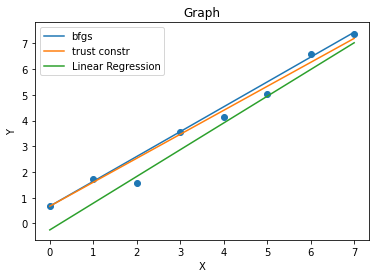

In [85]:
x=np.arange(0,8,1) #defining x and y
y=x+[random.uniform(-1,1) for p in range(8)]
N=len(x) #datasize of datasets
noq=math.ceil(np.log2(N))
yn=np.linalg.norm(y)
t=y
y=y/yn
j=[0.6,0.6] #guess values for a and b

%timeit out = minimize(calc_cf, x0=j, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calc_cf, x0=j, method="trust-constr", options={'maxiter':200}, tol=1e-6)

outa=out['x'][0];outb=out['x'][1]
out1a=out1['x'][0];out1b=out1['x'][1]

%timeit m1 = LinearRegression().fit(x.reshape((-1,1)), t)

p.scatter(x,y*yn)
xf=np.linspace(min(x),max(x),100)
p.plot(xf,outa*xf+outb,label='bfgs')
p.plot(xf,out1a*xf+out1b,label='trust constr')
p.plot(xf,m1.coef_*xf+m1.intercept_,label='Linear Regression')
p.legend()
p.title('Graph')
p.xlabel('X')
p.ylabel('Y')
p.show()


In [29]:
import os
import numpy as np 
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def p_d(df,f_c,f_o,t_s):
    label = df[f_c].shift(-f_o);
    X = np.array(df[[f_c]]); 
    X = preprocessing.scale(X) 
    X_lately = X[-f_o:]
    X = X[:-f_o] 
    label.dropna(inplace=True); 
    y = np.array(label) 
    X_train, X_test, Y_train, Y_test =train_test_split(X, y)

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

df = pd.read_csv("C:/Users/Darth Gravito/Downloads/prices/prices.csv") 
df=df[df.symbol=='GOOG']



f_c = 'close'
f_o = 5 
t_s = 0.2; 

X_train, X_test, Y_train, Y_test , X_lately =p_d(df,f_c,f_o,t_s);


In [43]:
def calc_cf_poly(ev):
    
    tr_sol=ev[0]
    for i in range(1,len(ev)):
        tr_sol += ev[i] * x**i
    
    ntri=np.linalg.norm(tr_sol)
    
    tr_sol=tr_sol/ntri
    
    tr_sol0=ntri/yn * i_p(y,tr_sol)
    
    return (1-tr_sol0)**2


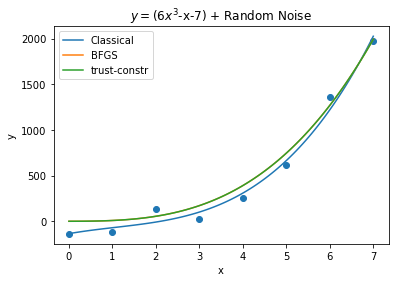

In [89]:
import timeit
x = np.arange(0,8,1)
y = (6*x**3-x-7) + [random.uniform(-150,150) for p in range(8)]
N = len(x)
nqubits = math.ceil(np.log2(N))
       
yn = np.linalg.norm(y)       #normalise y data set
y = y/yn

order = 3

x0 = [random.uniform(0,2) for p in range(order+1)]    #random initial guess for a and b

#now use different classical optimisers to see which one works best
 
starttime = timeit.default_timer()
out = minimize(calc_cf_poly, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
endtime=timeit.default_timer()
out1 = minimize(calc_cf_poly, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)
 
starttime1 = timeit.default_timer()
class_fit = np.polyfit(x,y*yn,order)
class_fit = class_fit[::-1]
endtime1 =timeit.default_timer()

xfit = np.linspace(min(x), max(x), 100)

def return_fits(xfit):
    c_fit = np.zeros(100)
    q_fit = np.zeros(100)
    q_fit1 = np.zeros(100)
    for i in range(order+1):
        c_fit += xfit**i*class_fit[i]
        q_fit += xfit**i*out['x'][i]
        q_fit1 += xfit**i*out1['x'][i]

        

    return c_fit, q_fit, q_fit1
c_fit, q_fit, q_fit1 = return_fits(xfit)

p.scatter(x,y*yn)
xfit = np.linspace(min(x), max(x), 100)
p.plot(xfit, c_fit, label='Classical')
p.plot(xfit, q_fit, label='BFGS')
p.plot(xfit, q_fit1, label='trust-constr')
p.legend()
p.title("$y = (6x^3$-x-7) + Random Noise")
p.xlabel("x")
p.ylabel("y")
p.show()

In [90]:
print('Time taken for multivariate quantum regression',endtime - starttime)
print('Time taken for multivariate regression',endtime1 - starttime1)

Time taken for multivariate quantum regression 0.43515039999965666
Time taken for multivariate regression 0.0010484000003998517
